# Trabalho de Computação 2021.2
Alexandre Almeida & Pedro Pereira

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
est=pd.read_csv('campeonato-brasileiro-estatisticas-full.csv',sep=';',error_bad_lines = False)
par=pd.read_csv('campeonato-brasileiro-full.csv',sep=';',error_bad_lines = False)

In [120]:
# Imagens do escudo dos times
urlCruzeiro='https://upload.wikimedia.org/wikipedia/commons/b/bc/Logo_Cruzeiro_1996.png'
urlSantos='https://upload.wikimedia.org/wikipedia/commons/thumb/3/35/Santos_logo.svg/1200px-Santos_logo.svg.png'
urlCorinthians='https://upload.wikimedia.org/wikipedia/pt/b/b4/Corinthians_simbolo.png'
urlFluminense='https://upload.wikimedia.org/wikipedia/pt/thumb/a/a3/FFC_escudo.svg/1200px-FFC_escudo.svg.png'
urlFlamengo='https://upload.wikimedia.org/wikipedia/commons/9/93/Flamengo-RJ_%28BRA%29.png'
urlAtleticoMG='https://upload.wikimedia.org/wikipedia/commons/5/5f/Atletico_mineiro_galo.png'
urlSaoPaulo='https://upload.wikimedia.org/wikipedia/pt/4/4b/S%C3%A3o_Paulo_Futebol_Clube.png'
urlGremio='https://upload.wikimedia.org/wikipedia/commons/2/2e/Gremio-Logo.png'
urlPalmeiras='https://upload.wikimedia.org/wikipedia/commons/thumb/1/10/Palmeiras_logo.svg/1024px-Palmeiras_logo.svg.png'
urlInternacional='https://upload.wikimedia.org/wikipedia/commons/f/f1/Escudo_do_Sport_Club_Internacional.svg'

def path_to_image_html(path):
    return '<img src="'+ path + '" width="60" >'

def getPNG(nome):
  if nome=='Cruzeiro':
    return urlCruzeiro
  if nome=='Santos':
    return urlSantos
  if nome=='Corinthians':
    return urlCorinthians
  if nome=='Fluminense':
    return urlFluminense
  if nome=='Flamengo':
    return urlFlamengo
  if nome=='Atlético-MG':
    return urlAtleticoMG
  if nome=='São Paulo':
    return urlSaoPaulo
  if nome=='Grêmio':
    return urlGremio
  if nome=='Palmeiras':
    return urlPalmeiras
  if nome=='Internacional':
    return urlInternacional
  return nome


# Limpeza das bases

In [5]:
par.drop( 'Horário', axis=1, inplace=True)
par.drop( 'Dia', axis=1, inplace=True)
par.drop( 'Arena', axis=1, inplace=True)
par.index+=1
par.index=par['ID']
par=par.drop(['ID'],axis=1)
par['Mandante'] = par['Mandante'].str.title()
par['Visitante'] = par['Visitante'].str.title()
par['Vencedor'] = par['Vencedor'].str.title()
trocas = {'Atlético-Mg': 'Atlético-MG',
                'América-Mg': 'América-MG',
                'Athletico-Pr': 'Athlético-PR',
                'Athlético-Pr': 'Athlético-PR',
                'Botafogo-Rj': 'Botafogo-RJ',
                'Botafogo-Sp': 'Botafogo-SP',
                'América-Rn': 'América-RN',
                'Atlético-Go': 'Atlético-GO',
                'Csa': 'CSA'}
par['Mandante'] = par['Mandante'].replace(trocas)
par['Visitante'] = par['Visitante'].replace(trocas)
par['Vencedor'] = par['Vencedor'].replace(trocas)
todosTimes=par['Mandante'].unique()
todosTimes


array(['Fluminense', 'Vasco', 'Vitória', 'Botafogo-RJ', 'Juventude',
       'Guarani', 'Cruzeiro', 'América-MG', 'Goiás', 'Coritiba', 'Bahia',
       'Flamengo', 'Gama', 'Internacional', 'Ponte Preta', 'Santos',
       'Palmeiras', 'Athlético-PR', 'Corinthians', 'Atlético-MG',
       'Portuguesa', 'Grêmio', 'São Paulo', 'Santa Cruz', 'Sport',
       'Paraná', 'Remo', 'São Caetano', 'Malutrom', 'Botafogo-SP',
       'Figueirense', 'Paysandu', 'Fortaleza', 'Criciúma', 'Brasiliense',
       'América-RN', 'Náutico', 'Ipatinga', 'Avaí', 'Santo André',
       'Barueri', 'Atlético-GO', 'Ceará', 'Grêmio Prudente',
       'Chapecoense', 'Joinville', 'CSA', 'Bragantino', 'Cuiabá'],
      dtype=object)

In [6]:
est

,ID,Mandante,Chutes,Chutes a gol,Posse de bola,Passes,Precisão de passe,Faltas,Cartões amarelos,Cartões vermelhos,Impedimentos,Escanteios
0,6041,1,13.0,0.0,45%,326.0,NaN,20.0,2.0,0.0,3.0,3.0
1,6041,0,16.0,0.0,55%,388.0,NaN,21.0,2.0,0.0,0.0,5.0
2,6040,1,17.0,0.0,50%,406.0,NaN,20.0,2.0,0.0,2.0,11.0
3,6040,0,10.0,0.0,50%,426.0,NaN,14.0,4.0,0.0,4.0,2.0
4,6042,1,26.0,11.0,74%,702.0,NaN,9.0,2.0,0.0,1.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4801,8439,0,16.0,5.0,61%,485.0,80%,15.0,6.0,0.0,3.0,4.0
4802,8440,1,16.0,3.0,64%,468.0,81%,19.0,1.0,0.0,2.0,9.0
4803,8440,0,11.0,5.0,36%,274.0,66%,22.0,3.0,0.0,2.0,4.0
4804,8360,1,20.0,7.0,56%,441.0,83%,17.0,5.0,0.0,0.0,0.0


In [7]:
est=est.sort_values('ID')
est.index=est['ID']
est=est.drop(['ID'],axis=1)
est.drop('Precisão de passe', axis=1, inplace=True)
est.drop('Chutes a gol', axis=1, inplace=True)

Como só queremos trabalhar com temporadas completas de pontos corridos, precisamos dropar as linhas referentes às temporadas de 2000, 2001, 2002 e 2021. 
Por inspeção, precisamos apagar as linhas de ID de
 0 a 1053 e de 8320 a 8440.

In [8]:
par.drop(list(range(1,1053+1)), axis=0, inplace=True)
par.drop(list(range(8320,8440+1)), axis=0, inplace=True)
par.index-=1053
est.index-=1053
est.drop(est[est.index>7266].index,inplace = True) # Da primeira partida da temporada de 2021 em diante

Vamos verificar o número de partidas em cada temporada. Em 2003 e 2004 havia 24 equipes (552 partidas), em 2005, 22 equipes (462 partidas) e, de 2006 em diante, 20 equipes (380 partidas).

In [9]:
temporadas=['2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020']
anos=[]
numJogos={}
for i in par.index:
  anos.append(par.loc[i][1][:4])
for i in temporadas:
  numJogos[i]=(anos.count(i))
print(numJogos)

{'2003': 552, '2004': 552, '2005': 462, '2006': 380, '2007': 383, '2008': 377, '2009': 380, '2010': 380, '2011': 380, '2012': 380, '2013': 380, '2014': 380, '2015': 380, '2016': 380, '2017': 380, '2018': 380, '2019': 380, '2020': 268}


Percebemos que há um erro em 2007 (377 partidas) e 2008 (383 partidas), quando verificamos, vimos que havia 3 jogos de 2008 registrados como ocorridos em 2007, então vamos corrigir isso manualmente. Quanto a 2020, o restante das partidas aconteceu em 2021, por isso não consta 380 partidas no dicionário numJogos acima.

In [10]:
par.loc[1957:1959] # Essas são as 3 partidas que aconteceram na segunda rodada de 2008 (por inspeção)

,Rodada,Data,Mandante,Visitante,Vencedor,Mandante Placar,Visitante Placar,Estado Mandante,Estado Visitante,Estado Vencedor
ID,,,,,,,,,,
1957,2,2007-05-17,Sport,Vitória,-,0.0,0.0,PE,ES,-
1958,2,2007-05-17,Cruzeiro,Botafogo-RJ,Cruzeiro,1.0,0.0,MG,RJ,MG
1959,2,2007-05-17,Vasco,Portuguesa,Vasco,3.0,1.0,RJ,SP,RJ


In [11]:
par.loc[1957:1959]['Data']='2008-05-17' #Primeiro mudamos a data
par=par.sort_values(['Data']) #Organizamos por data novamente
par.index=list(range(1,7267)) #Reorganizando os IDs

Agora de "estatísticas", vamos remover as duplicatas e as linhas com NaN

In [12]:
est.isnull().sum()

Mandante              0
Chutes               52
Posse de bola        52
Passes               52
Faltas               52
Cartões amarelos     52
Cartões vermelhos    52
Impedimentos         52
Escanteios           52
dtype: int64

In [13]:
est=est.dropna(axis=0,how='any')
est.drop_duplicates(inplace=True)

Substituindo Data por Temporada. Obs.: toda temporada acontece no ano correspondente, com exceção de 2020, que, por conta da pandemia, durou até os primeiros meses de 2021.

In [14]:
temporada=[]
for i in par.index:
  temporada.append(par.loc[i][1][:4])
par.insert(2,'Temporada',temporada,True)
par.replace(to_replace='2021', value = '2020',inplace=True) #Substituindo os valores 2021 para 2020

temporada=[]
for i in est.index:
  temporada.append(par.loc[i][1][:4])
est.insert(0,'Temporada',temporada,True)
est.replace(to_replace='2021', value = '2020',inplace=True)

par['Rodada']=par['Rodada'].astype(int) # Transformando os dados em inteiros
par['Temporada']=par['Temporada'].astype(int)
est['Temporada']=est['Temporada'].astype(int)

Verificando se os IDs de "par" e "est" estão alinhados: a partida que "par" deve retornar com o primeiro ID disponível em "est" deve ser a primeira partida da temporada de 2015. Verificou-se externamente que os dados batem perfeitamente.

In [15]:
par.loc[4987] #Primeira partida da temporada de 2015

Rodada                        1
Data                 2015-05-09
Temporada                  2015
Mandante              Palmeiras
Visitante           Atlético-MG
Vencedor                      -
Mandante Placar               2
Visitante Placar              2
Estado Mandante              SP
Estado Visitante             MG
Estado Vencedor               -
Name: 4987, dtype: object

Verificando se "est" tem todos os jogos das temporadas de 2015 até 2020:
10 partidas por rodada, 38 rodadas no campeonato, 6 temporadas, multiplicamos por 2 porque em est cada ID aparece 2 vezes e subtraímos por 52 que foi o número de partidas descartadas. O resultado deve ser o número de linhas de "est".

In [16]:
10*38*6*2-52

4508

Adicionando uma coluna "Equipe" em "est" ao lado de "Mandante" que indica a equipe correspondente com os dados daquela linha.

In [17]:
IDsEst=[]
for i in est.index:
  if i not in IDsEst:
    IDsEst.append(i)
time=[]
for i in IDsEst:
  time.append(par.loc[i][3])
  time.append(par.loc[i][4])
est.insert(1,"Equipe",time,True)

In [18]:
est

,Temporada,Equipe,Mandante,Chutes,Posse de bola,Passes,Faltas,Cartões amarelos,Cartões vermelhos,Impedimentos,Escanteios
ID,,,,,,,,,,,
4987,2015,Palmeiras,1,17.0,50%,406.0,20.0,2.0,0.0,2.0,11.0
4987,2015,Atlético-MG,0,10.0,50%,426.0,14.0,4.0,0.0,4.0,2.0
4988,2015,Chapecoense,1,13.0,45%,326.0,20.0,2.0,0.0,3.0,3.0
4988,2015,Coritiba,0,16.0,55%,388.0,21.0,2.0,0.0,0.0,5.0
4989,2015,Fluminense,1,26.0,74%,702.0,9.0,2.0,0.0,1.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...
7264,2020,Fortaleza,1,18.0,56%,480.0,15.0,0.0,0.0,2.0,8.0
7265,2020,Bragantino,0,17.0,53%,505.0,4.0,0.0,0.0,2.0,7.0
7265,2020,Grêmio,1,12.0,47%,469.0,7.0,2.0,1.0,0.0,5.0


Toda limpeza e organização dos dados foi concluída. Partiremos para a formulação das funções que utilizaremos.

---

# Funções

Função que isola todas as partidas de uma temporada até a rodada informada:

In [19]:
def fjogos(temporada,rodada):
  jogos=par[(par['Temporada']==temporada) & (par['Rodada']<=rodada)]
  jogos.index.name='ID'
  return jogos

Função que recebe a temporada e a rodada e retorna a tabela ao final da rodada informada:

* Observação: há 14 casos de decisões judiciais que alteraram as pontuações de certas equipes em algumas edições. Essas alterações não serão ignoradas, serão adicionadas manualmente no script da função, mas serão consideradas apenas após a última rodada do campeonato. Exemplo: se o Fluminense foi punido com -3 pontos na edição de 2003 após a 31ª rodada, esses pontos só serão descontados após a **última** rodada.

In [20]:
def montaTabela(temporada,rodada):
  if temporada==2003 or temporada==2004:
    nTimes=24
  if temporada==2005:
    nTimes=22
  if temporada>2005:
    nTimes=20
  jogos=fjogos(temporada,rodada)
  times=[]
  tabela=pd.DataFrame()
  for i in par[(par['Temporada']==temporada)]['Mandante']:
    if i not in times:
      times.append(i)
  tabela['Equipe']=times
  tabela['Pontos']=[0]*nTimes
  tabela['Jogos']=[0]*nTimes
  tabela['Vitórias']=[0]*nTimes
  tabela['Empates']=[0]*nTimes
  tabela['Derrotas']=[0]*nTimes
  tabela['Vitórias']=[0]*nTimes
  tabela['GP']=[0]*nTimes
  tabela['GC']=[0]*nTimes
  tabela['SG']=[0]*nTimes
  tabela.index=tabela['Equipe']
  tabela.drop('Equipe', axis=1, inplace=True)
  for i in jogos.index:
    if par.loc[i]['Vencedor']!='-': #Não empate
      vencedor=par.loc[i]['Vencedor']
      if vencedor==par.loc[i]['Mandante']:
        perdedor=par.loc[i]['Visitante']
        tabela.loc[vencedor]['GP']+=jogos.loc[i]['Mandante Placar']
        tabela.loc[perdedor]['GC']+=jogos.loc[i]['Mandante Placar']
        tabela.loc[perdedor]['GP']+=jogos.loc[i]['Visitante Placar']
        tabela.loc[vencedor]['GC']+=jogos.loc[i]['Visitante Placar']
        tabela.loc[vencedor]['SG']+=(jogos.loc[i]['Mandante Placar']-jogos.loc[i]['Visitante Placar'])
        tabela.loc[perdedor]['SG']+=(jogos.loc[i]['Visitante Placar']-jogos.loc[i]['Mandante Placar'])
      if vencedor==par.loc[i]['Visitante']:
        perdedor=par.loc[i]['Mandante']
        tabela.loc[vencedor]['GP']+=jogos.loc[i]['Visitante Placar']
        tabela.loc[perdedor]['GC']+=jogos.loc[i]['Visitante Placar']
        tabela.loc[perdedor]['GP']+=jogos.loc[i]['Mandante Placar']
        tabela.loc[vencedor]['GC']+=jogos.loc[i]['Mandante Placar']
        tabela.loc[vencedor]['SG']+=(jogos.loc[i]['Visitante Placar']-jogos.loc[i]['Mandante Placar'])
        tabela.loc[perdedor]['SG']+=(jogos.loc[i]['Mandante Placar']-jogos.loc[i]['Visitante Placar'])
      tabela.loc[vencedor]['Pontos']+=3
      tabela.loc[vencedor]['Jogos']+=1
      tabela.loc[vencedor]['Vitórias']+=1
      tabela.loc[perdedor]['Jogos']+=1
      tabela.loc[perdedor]['Derrotas']+=1
    if par.loc[i]['Vencedor']=='-': #Empate
      casa=par.loc[i]['Mandante']
      fora=par.loc[i]['Visitante']
      tabela.loc[casa]['Pontos']+=1
      tabela.loc[fora]['Pontos']+=1
      tabela.loc[casa]['Jogos']+=1
      tabela.loc[fora]['Jogos']+=1
      tabela.loc[casa]['Empates']+=1
      tabela.loc[fora]['Empates']+=1
      tabela.loc[casa]['GP']+=jogos.loc[i]['Mandante Placar']
      tabela.loc[casa]['GC']+=jogos.loc[i]['Visitante Placar']
      tabela.loc[fora]['GP']+=jogos.loc[i]['Visitante Placar']
      tabela.loc[fora]['GC']+=jogos.loc[i]['Mandante Placar']
  if temporada==2003:
    tabela.loc['Fluminense']['Pontos']+=2 # Escalação irregular por parte do Paysandu	
    tabela.loc['Paysandu']['Pontos']-=8 # Escalação irregular de jogadores	
    tabela.loc['Ponte Preta']['Pontos']-=4 # Escalação irregular de jogadores	
    tabela.loc['Ponte Preta']['Pontos']+=3 # Escalação irregular por parte do Paysandu	
    tabela.loc['Juventude']['Pontos']+=3 # Escalação irregular por parte da Ponte Preta	
    tabela.loc['São Caetano']['Pontos']+=3 # Escalação irregular por parte do Paysandu	
    tabela.loc['Internacional']['Pontos']+=2 # Escalação irregular por parte da Ponte Preta	
    tabela.loc['Corinthians']['Pontos']+=2 # Escalação irregular por parte do Paysandu	
  if temporada==2004:
    tabela.loc['São Caetano']['Pontos']-=24 # Escalação irregular de jogador (Serginho)	
  if temporada==2005:
    tabela.loc['Brasiliense']['Pontos']-=1 # Venda irregular de ingressos diante do Vasco	
    tabela.loc['Vasco']['Pontos']+=2 # Venda irregular de ingressos por parte do Brasiliense	
  if temporada==2010:
    tabela.loc['Grêmio Prudente']['Pontos']-=3 # Escalação irregular de jogadores	
  if temporada==2013:
    tabela.loc['Flamengo']['Pontos']-=4 # Escalação irregular de jogadores	
    tabela.loc['Portuguesa']['Pontos']-=4 # Escalação irregular de jogadores	
  return tabela.sort_values(by=['Pontos','Vitórias','SG','GP'] , ascending=False)

In [21]:
montaTabela(2013,38)

,Pontos,Jogos,Vitórias,Empates,Derrotas,GP,GC,SG
Equipe,,,,,,,,
Cruzeiro,76,38,23,7,8,77,37,40
Grêmio,65,38,18,11,9,42,35,7
Athlético-PR,64,38,18,10,10,65,49,16
Botafogo-RJ,61,38,17,10,11,55,41,14
Vitória,59,38,16,11,11,59,53,6
Goiás,59,38,16,11,11,48,44,4
Santos,57,38,15,12,11,51,38,13
Atlético-MG,57,38,15,12,11,49,38,11
São Paulo,50,38,14,8,16,39,40,-1


Função que recebe temporada e rodada e retorna times que foram líderes pelo menos uma vez e por quantas partidas lideraram:

In [22]:
def vezesLíder(temporada,rodada):
  times2=[]
  tabela2=pd.DataFrame()
  for i in par[(par['Temporada']==temporada)]['Mandante']:
      if i not in times2:
        times2.append(i)
  tabela2['Equipe']=times2
  tabela2['Líder']=[0]*20
  tabela2.index=tabela2['Equipe']
  tabela2.drop('Equipe', axis=1, inplace=True)
  for i in range(1,rodada+1):
    lider=montaTabela(temporada,i)
    liderdavez=lider.index[0]
    tabela2.loc[liderdavez]['Líder']+=1
  for i in tabela2.index:
    if tabela2.loc[i]['Líder']==0:
      tabela2=tabela2.drop(i)
  return tabela2.sort_values(by='Líder' , ascending=False)

Função que recebe temporada e tipo de dados, nesse caso, impedimentos ('i'), cartões amarelos ('ca'), cartões vermelhos ('cv') e faltas ('f'), e retorna o número de vezes que essas infrações ocorreram na temporada.

In [23]:
def contaDados(temporada,tipo): #'i' para impedimentos, 'ca' para cartões amarelos, 'cv' para cartões vermelhos, 'f' para faltas
  if tipo=='i':
    dado='Impedimentos'
  if tipo=='ca':
    dado='Cartões amarelos'
  if tipo=='cv':
    dado='Cartões vermelhos'
  if tipo=='f':
    dado='Faltas'
  temp=fjogos(temporada,38)
  return int(est.loc[temp.iloc[0].name:temp.iloc[-1].name][dado].sum())


Função que recebe temporada e tipo de dados, nesse caso, impedimentos ('i'), cartões amarelos ('ca'), cartões vermelhos ('cv'), faltas ('f') e passes ('p'), e retorna os times com os maiores números observados para o tipo de dado.

In [24]:
def contaDadosTop(temporada,tipo): #'i' para impedimentos, 'ca' para cartões amarelos, 'cv' para cartões vermelhos, 'f' para faltas, 'p' para passes
  times={}
  if tipo=='i':
    dado='Impedimentos'
  if tipo=='ca':
    dado='Cartões amarelos'
  if tipo=='cv':
    dado='Cartões vermelhos'
  if tipo=='f':
    dado='Faltas'
  if tipo=='p':
    dado='Passes'
  temp=fjogos(2016,38)
  base=est.loc[temp.iloc[0].name:temp.iloc[-1].name]
  a=base.groupby('Equipe').sum().astype(int)
  return a[dado].sort_values(0,ascending=False)

In [25]:
contaDadosTop(2016,'f')

Equipe
Palmeiras        642
Ponte Preta      632
São Paulo        628
Botafogo-RJ      626
Vitória          620
Internacional    617
Fluminense       616
Santa Cruz       610
Atlético-MG      610
Coritiba         609
Figueirense      596
Grêmio           593
Sport            589
Chapecoense      586
Athlético-PR     585
Flamengo         554
Corinthians      540
América-MG       535
Cruzeiro         530
Santos           514
Name: Faltas, dtype: int64

In [26]:
contaDadosTop(2016,'i').nlargest(5).values

array([97, 93, 85, 84, 82])

Partindo para a construção de relações e visualização de dados. Vamos começar com a tabela acumulada do Campeonato Brasileiro desde o início dos pontos corridos. Em outras palavras, a tabela do campeonato hoje juntando as pontuações de cada time de cada temporada até 2020.

# Tabela acumulada dos pontos corridos até 2020

In [36]:
tabela=pd.DataFrame()
times=par.Mandante.unique()
nTimes=len(times)
participacoes={}
for i in times:
  participacoes[i]=0
tabela['Pontos']=[0]*nTimes
tabela['Jogos']=[0]*nTimes
tabela['Vitórias']=[0]*nTimes
tabela['Empates']=[0]*nTimes
tabela['Derrotas']=[0]*nTimes
tabela['Vitórias']=[0]*nTimes
tabela['GP']=[0]*nTimes
tabela['GC']=[0]*nTimes
tabela['SG']=[0]*nTimes
tabela['Edições']=[0]*nTimes
tabela.index=times
for temporada in list(range(2003,2020+1)):
  if temporada==2003:
    rodada=46
  if temporada==2004:
    rodada=46
  if temporada==2005:
    rodada=42
  if temporada>2005:
    rodada=38
  jogos=fjogos(temporada,rodada)
  participantes=jogos.Mandante.unique() #Times que participaram da temporada
  for i in participantes:
    participacoes[i]+=1
  for i in jogos.index:
    if par.loc[i]['Vencedor']!='-': #Não empate
      vencedor=par.loc[i]['Vencedor']
      if vencedor==par.loc[i]['Mandante']:
        perdedor=par.loc[i]['Visitante']
        tabela.loc[vencedor]['GP']+=jogos.loc[i]['Mandante Placar']
        tabela.loc[perdedor]['GC']+=jogos.loc[i]['Mandante Placar']
        tabela.loc[perdedor]['GP']+=jogos.loc[i]['Visitante Placar']
        tabela.loc[vencedor]['GC']+=jogos.loc[i]['Visitante Placar']
        tabela.loc[vencedor]['SG']+=(jogos.loc[i]['Mandante Placar']-jogos.loc[i]['Visitante Placar'])
        tabela.loc[perdedor]['SG']+=(jogos.loc[i]['Visitante Placar']-jogos.loc[i]['Mandante Placar'])
      if vencedor==par.loc[i]['Visitante']:
        perdedor=par.loc[i]['Mandante']
        tabela.loc[vencedor]['GP']+=jogos.loc[i]['Visitante Placar']
        tabela.loc[perdedor]['GC']+=jogos.loc[i]['Visitante Placar']
        tabela.loc[perdedor]['GP']+=jogos.loc[i]['Mandante Placar']
        tabela.loc[vencedor]['GC']+=jogos.loc[i]['Mandante Placar']
        tabela.loc[vencedor]['SG']+=(jogos.loc[i]['Visitante Placar']-jogos.loc[i]['Mandante Placar'])
        tabela.loc[perdedor]['SG']+=(jogos.loc[i]['Mandante Placar']-jogos.loc[i]['Visitante Placar'])
      tabela.loc[vencedor]['Pontos']+=3
      tabela.loc[vencedor]['Jogos']+=1
      tabela.loc[vencedor]['Vitórias']+=1
      tabela.loc[perdedor]['Jogos']+=1
      tabela.loc[perdedor]['Derrotas']+=1
    if par.loc[i]['Vencedor']=='-': #Empate
      casa=par.loc[i]['Mandante']
      fora=par.loc[i]['Visitante']
      tabela.loc[casa]['Pontos']+=1
      tabela.loc[fora]['Pontos']+=1
      tabela.loc[casa]['Jogos']+=1
      tabela.loc[fora]['Jogos']+=1
      tabela.loc[casa]['Empates']+=1
      tabela.loc[fora]['Empates']+=1
      tabela.loc[casa]['GP']+=jogos.loc[i]['Mandante Placar']
      tabela.loc[casa]['GC']+=jogos.loc[i]['Visitante Placar']
      tabela.loc[fora]['GP']+=jogos.loc[i]['Visitante Placar']
      tabela.loc[fora]['GC']+=jogos.loc[i]['Mandante Placar']
# Decisões Judiciais:
  if temporada==2003:
    tabela.loc['Fluminense']['Pontos']+=2 # Escalação irregular por parte do Paysandu	
    tabela.loc['Paysandu']['Pontos']-=8 # Escalação irregular de jogadores	
    tabela.loc['Ponte Preta']['Pontos']-=4 # Escalação irregular de jogadores	
    tabela.loc['Ponte Preta']['Pontos']+=3 # Escalação irregular por parte do Paysandu	
    tabela.loc['Juventude']['Pontos']+=3 # Escalação irregular por parte da Ponte Preta	
    tabela.loc['São Caetano']['Pontos']+=3 # Escalação irregular por parte do Paysandu	
    tabela.loc['Internacional']['Pontos']+=2 # Escalação irregular por parte da Ponte Preta	
    tabela.loc['Corinthians']['Pontos']+=2 # Escalação irregular por parte do Paysandu	
  if temporada==2004:
    tabela.loc['São Caetano']['Pontos']-=24 # Escalação irregular de jogador (Serginho)	
  if temporada==2005:
    tabela.loc['Brasiliense']['Pontos']-=1 # Venda irregular de ingressos diante do Vasco	
    tabela.loc['Vasco']['Pontos']+=2 # Venda irregular de ingressos por parte do Brasiliense	
  if temporada==2010:
    tabela.loc['Grêmio Prudente']['Pontos']-=3 # Escalação irregular de jogadores	
  if temporada==2013:
    tabela.loc['Flamengo']['Pontos']-=4 # Escalação irregular de jogadores	
    tabela.loc['Portuguesa']['Pontos']-=4 # Escalação irregular de jogadores
tabelaAcumulada=tabela.sort_values(by=['Pontos','Vitórias','SG','GP'] , ascending=False)
for i in participacoes:
  tabelaAcumulada.loc[i]['Edições']=participacoes[i]
tabelaAcumulada.insert(0,'Equipe',tabelaAcumulada.index,True)
tabelaAcumulada.index=list(range(1,len(tabelaAcumulada)+1))
tabelaAcumulada.index.name='Colocação'

In [37]:
tabelaAcumulada

,Equipe,Pontos,Jogos,Vitórias,Empates,Derrotas,GP,GC,SG,Edições
Colocação,,,,,,,,,,
1,São Paulo,1169,704,327,188,189,1037,760,277,18
2,Santos,1097,704,305,182,217,1060,837,223,18
3,Flamengo,1080,704,296,196,212,984,845,139,18
4,Internacional,1045,666,292,167,207,893,734,159,17
5,Corinthians,1037,666,281,192,193,868,712,156,17
6,Cruzeiro,1030,666,293,151,222,978,818,160,17
7,Grêmio,1022,662,283,173,206,912,727,185,17
8,Fluminense,1001,704,270,189,245,946,906,40,18
9,Atlético-MG,973,666,267,172,227,967,875,92,17


# Campeões nos pontos corridos

In [38]:
anos=list(range(2003,2020+1))
campeoes=[]
for ano in anos:
  campeoes.append(montaTabela(ano,46).index[0])
campeoesSemDuplicata=[]
for i in campeoes:
  if i not in campeoesSemDuplicata:
    campeoesSemDuplicata.append(i)
serieCampeoes=pd.Series()
for i in campeoesSemDuplicata:
  serieCampeoes.loc[i]=campeoes.count(i)
serieCampeoes=serieCampeoes.sort_values()

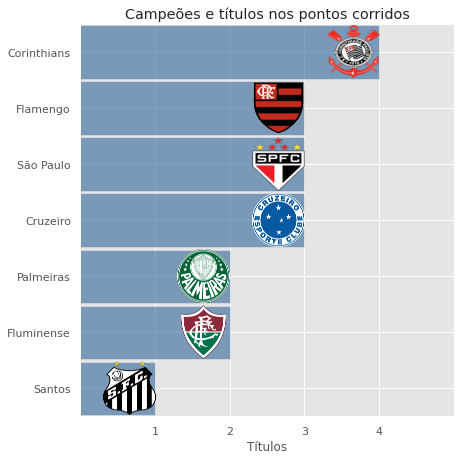

In [309]:
plt.style.use('ggplot')
plt.figure(figsize=(6.5,6.5))
height = 0.95
plt.barh(y=serieCampeoes.index, width=serieCampeoes.values, height=height, color=(0.2, 0.4, 0.6, 0.6), align='center')
plt.title('Campeões e títulos nos pontos corridos')
plt.xlabel('Títulos')
plt.xticks(range(1,5))
for i, (label, value) in enumerate(zip(serieCampeoes.index, serieCampeoes.values)):
  img = plt.imread(getPNG(label))
  plt.imshow(img, extent=[value-0.7, value, i-height/2, i+height/2],aspect='auto', zorder=2)
plt.xlim(0, max(serieCampeoes.values) * 1.25)
plt.ylim(-0.5, len(serieCampeoes.index) - 0.5)
plt.tight_layout()
plt.show()

# Análise de Competitividade

In [40]:
pontos=pd.Series()
for ano in range(2003,2020+1):
  a=montaTabela(ano,46)['Pontos']
  a.index=[ano]*len(a)
  pontos=pontos.append(a)

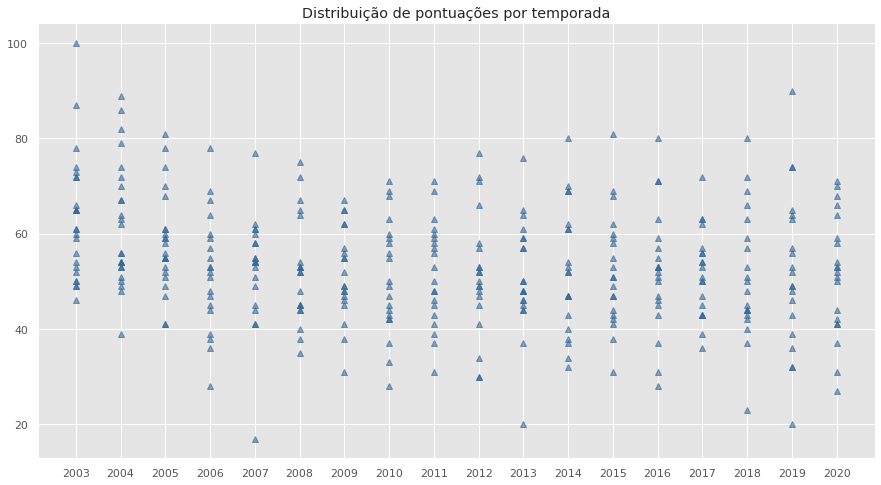

In [314]:
plt.figure(figsize=(15,8))
plt.plot(pontos,'s',color=(0.2, 0.4, 0.6, 0.6),marker='^')
plt.xticks(range(2003,2021))
plt.title('Distribuição de pontuações por temporada')
plt.show()

O gráfico acima nos permite visualizar a distribuição das pontuações ao final de cada temporada desde o início dos pontos corridos. A intenção do gráfico não é identificar as pontuações, mas sim visualizar o quão concentrados ou dispersas estão as pontuações. \
\
Podemos, então, ter uma noção superficial de quão competitiva foi a temporada, já que é de se esperar que, ao final de um campeonato competitivo, os times tenham pontuações semelhantes, proxímas umas das outras. No gráfico, isso implicaria nos traços da temporada correspondente mais próximos uns dos outros, mais concentrados. \
\
Poderíamos mensurar a dispersão dessas pontuações como uma medida da competitividade da temporada - grosseira, mas informativa em termos relativos. É isso que faremos a seguir.

In [315]:
pontosStats=pd.DataFrame()
pontosStats['Média']=0; pontosStats['Desvio Padrão']=0
pontosStats
for ano in range(2003,2020+1):
  pontosStats.loc[ano]=[pontos[pontos.index==ano].mean(), pontos[pontos.index==ano].std()]
pontosStats['Média Móvel']=pontosStats['Desvio Padrão'].rolling(7).mean()

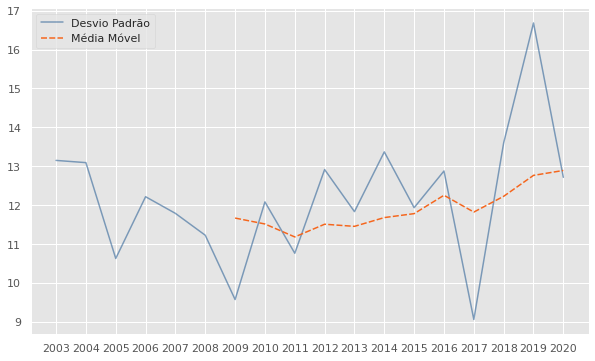

In [93]:
plt.figure(figsize=(10,6))
plt.xticks(range(2003,2021))
sns.lineplot(data=[pontosStats['Desvio Padrão'],pontosStats['Média Móvel']],palette=[(0.2,0.4,0.6,0.6),'#F5661D'])

Podemos ver no gráfico acima que os dois primeiros anos do Brasileirão na forma de pontos corridos, ambos com a participação de 24 equipes, tiveram um nível de estável de competição. No entanto, no ano de 2005, juntamente com a redução do número de participantes para 22 equipes, houve um aumento da competitividade do campeonato. Repare que, apesar de as primeiras competições terem tido mais times, isso não afeta a análise e não requer uma normalização das pontuações, pois nossa intenção é medir o quão distantes os pontos da média da temporada. Como a normalização respeita os intervalos entre os dados do conjunto, ela não alteraria o que estamos buscando mensurar. \
\
Vemos que 2009 e 2017 foram temporadas muito competitivas, mesmo que em 2009 os times do Z4 terminaram muito distantes dos outros e em 2017 os melhores times foram muito melhores (veja o gráfico da distribuição de pontos), principalmente o campeão, que foi o Corinthians. Isso se deve ao fato de toda a competição ter se concentrado, sobretudo, no meio da tabela. \
\
Além disso, vemos também, por meio da média móvel em 7 anos, que os últimos 10 anos o campeonato mostra uma tendência de diminuição da competitividade. Isso pode ser explicado pela escalabilidade do mercado de futebol, o que tem gerado uma desigualdade entre as equipes. Por outro lado, alguns clubes estão tendo mais visibilidade com a recente tendêcia de profissionalização da administração da diretoria e de implementação do modelo de clube-empresa, que já se mostrou bem-sucedido em outros países. Os maiores exemplos aqui no Brasil são o Red Bull Bragantino, que foi adquirido pela Red Bull e hoje é uma das equipes mais fortes do país, e o Cuiabá. Essa tendência, contudo, não se restringe somente aos times de menor expressividade, já que clubes como Botafogo, Vasco, Corinthians, etc. já visam a adoção desse modelo de gestão. Assim, caso mais times sigam esse modelo de gestão, é provável que futuramente a competitividade aumente, porém, como é um fenômeno ainda muito recente, não foi possível observar essa tendência claramente.

# Determinismo do 1º turno

## O campeão

Um padrão muito forte que pode ser observado na competição é que o líder ao final do primeiro turno, isto é, na metade do campeonato, geralmente conquista o título da temporada. Vamos visualizar essa relação.

In [44]:
from IPython.core.display import display,HTML
df=pd.DataFrame()
df['Líder no 1º turno']=[0]*18
df['Campeão']=[0]*18
df.index=list(range(2003,2020+1))
for i in range(2003,2020+1):
  if i==2003 or i==2004:
    meio=23
  if i==2005:
    meio=21
  if i>2005:
    meio=19
  df.loc[i]=[getPNG(montaTabela(i,meio).index[0]),getPNG(montaTabela(i,2*meio).index[0])]
df.insert(0,'Ano',df.index,True)
df=pd.concat([df[:9].reset_index(drop=1),df[9:].reset_index(drop=1)], axis=1).fillna('')
image_cols = ['Líder no 1º turno', 'Campeão']  # define as colunas que serão convertidas em html
format_dict = {}
for image_col in image_cols:
    format_dict[image_col] = path_to_image_html
display(HTML(df.to_html(escape=False ,formatters=format_dict,index=False)))
    

Ano,Líder no 1º turno,Campeão,Ano,Líder no 1º turno,Campeão
2003,,,2012,,
2004,,,2013,,
2005,,,2014,,
2006,,,2015,,
2007,,,2016,,
2008,,,2017,,
2009,,,2018,,
2010,,,2019,,
2011,,,2020,,


Apenas 5 vezes (de 18 edições) durante toda a história dos pontos corridos o líder na metade do campeonato não foi campeão do campeonato.

## Os primeiros e os últimos

In [45]:
primeirosFicam=[] # Esse bloco demora quase 4 minutos para rodar, mas funciona 
for i in range(2003,2020+1):
  if i==2003 or i==2004:
    meio=23
  if i==2005:
    meio=21
  if i>2005:
    meio=19
  times=[]
  for j in montaTabela(i,meio).index[:4]:
    if j in montaTabela(i,2*meio).index[:4]:
      times.append(j)
  primeirosFicam.append(len(times))
ultimosFicam=[]
for i in range(2003,2020+1):
  if i==2003 or i==2004:
    meio=23
  if i==2005:
    meio=21
  if i>2005:
    meio=19
  times=[]
  for j in montaTabela(i,meio).index[-4:]:
    if j in montaTabela(i,2*meio).index[-4:]:
      times.append(j)
  ultimosFicam.append(len(times))

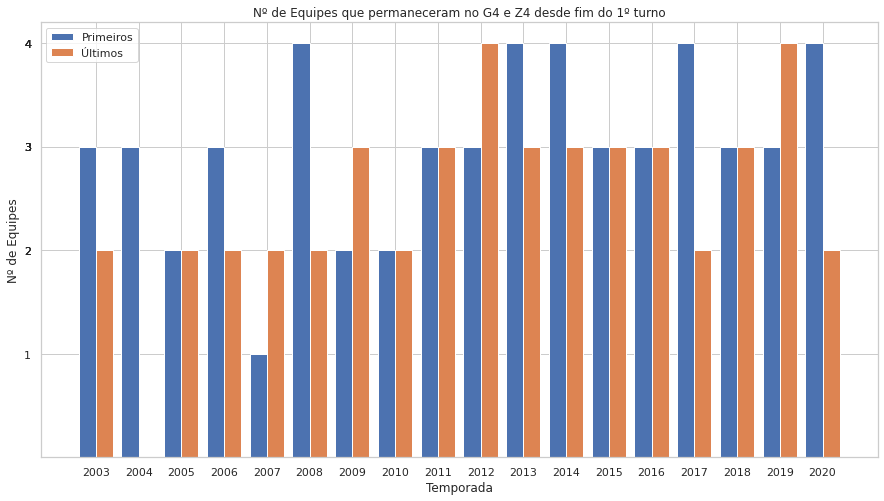

In [76]:
sintese=pd.DataFrame()
sintese['Primeiros']=primeirosFicam
sintese['Últimos']=ultimosFicam
sintese.index=range(2003,2020+1)
X = list(range(2003,2020+1))
Y = sintese.Primeiros
Z = sintese.Últimos
X_axis = np.arange(len(X))
plt.figure(figsize=(15,8))
plt.bar(X_axis - 0.2, Y, 0.4, label = 'Primeiros')
plt.bar(X_axis + 0.2, Z, 0.4, label = 'Últimos')
plt.xticks(X_axis, X)
plt.yticks(Y)
plt.xlabel("Temporada")
plt.ylabel("Nº de Equipes")
plt.title("Nº de Equipes que permaneceram no G4 e Z4 desde fim do 1º turno")
plt.legend()
plt.show()

Estatísticamente, existe em torno de 72% de chances da equipe que terminou no primeiro turno no G4 de finalizar a competição entre os quatro primeiros. Analogamente, para o Z4, existem 62,5% de chances. \
Isso evidencia o quão decisiva é a campanha de uma equipe até a metade do campeonato. Quando a fase de um time é muito boa ou muito ruim, é díficil que esse cenário se reverta.

# Estatísticas Gerais

## Relação entre mando de campo e resultado

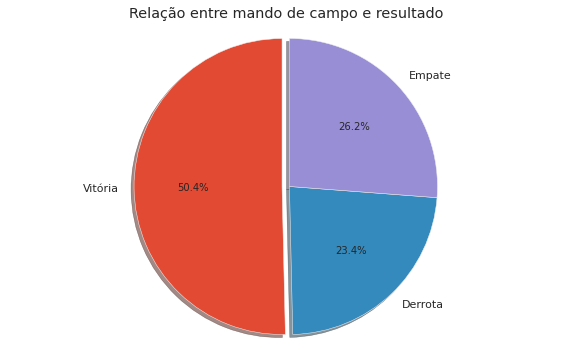

In [313]:
vitoria=len(par[par['Mandante']==par['Vencedor']])/len(par)
derrota=len(par[par['Visitante']==par['Vencedor']])/len(par)
empate=len(par[par['Vencedor']=='-'])/len(par)
labels=['Vitória','Derrota','Empate']
sizes=[vitoria,derrota,empate]
explode=(0.05, 0, 0)
plt.figure(figsize=(10,6))
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.title('Relação entre mando de campo e resultado')
plt.show()

Em média, os mandantes vencem metade dos jogos em casa.

## Desempenho dos clubes mandantes



In [48]:
vitoriasMandante=pd.DataFrame()
vitoriasMandante['Vitórias']=[0]*len(par.Mandante.unique())
vitoriasMandante['Empates']=[0]*len(par.Mandante.unique())
vitoriasMandante['Derrotas']=[0]*len(par.Mandante.unique())
vitoriasMandante.index=par.Mandante.unique()
for i in vitoriasMandante.index:
  vitoriasMandante.loc[i]['Vitórias']=len(par[(par.Mandante==i) & (par.Vencedor==i)])
  vitoriasMandante.loc[i]['Empates']=len(par[(par.Mandante==i) & (par.Vencedor=='-')])
  vitoriasMandante.loc[i]['Derrotas']=len(par[(par.Mandante==i) & (par.Vencedor!=i) & (par.Vencedor!='-')])
vitoriasMandante=vitoriasMandante.sort_values(ascending=False, by='Vitórias')
for i in vitoriasMandante.index:
  vitoriasMandante.loc[i]=vitoriasMandante.loc[i]/len(par[par.Mandante==i])

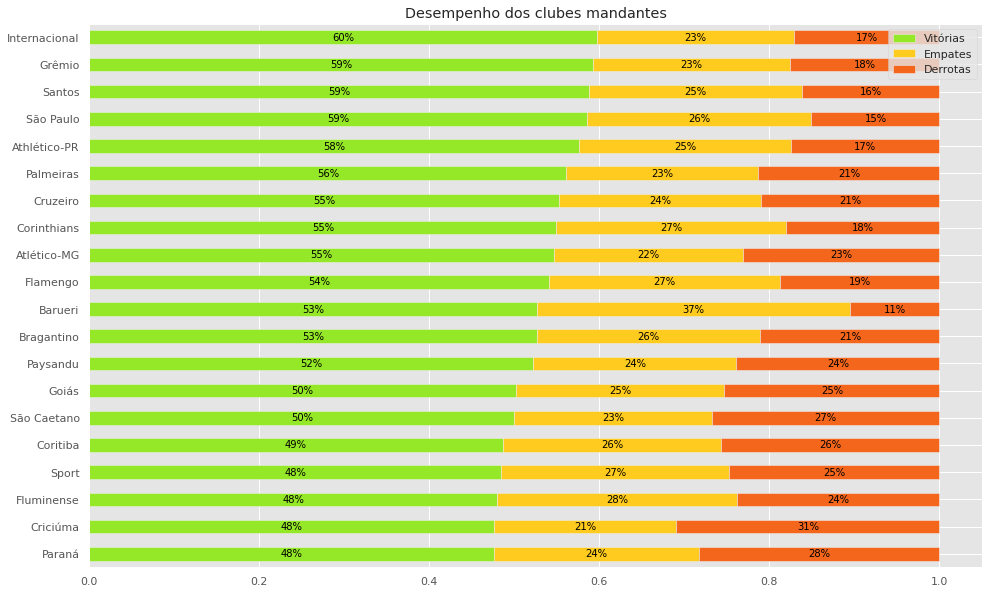

In [311]:
ax = vitoriasMandante.nlargest(20,'Vitórias').sort_values('Vitórias').plot.barh(stacked=True, cmap='tab10', figsize=(16, 10),color={"Vitórias": "#95E827", "Empates": "#FFCB1F",'Derrotas': '#F5661D'})
ax.set_title('Desempenho dos clubes mandantes')
for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    if width > 0:
         ax.annotate(f'{width:.0%}',xy=(left+width/2, bottom+height/2), ha='center', va='center',color='black')

Esse gráfico exibe as 20 equipes com o melhor índice de vítorias como mandante, também mostra a porcentagem de empates e derrotas. Pode-se perceber a dominância das equipes gaúchas e paulistas com o mando de campo. Além disso, também é possível perceber que o Barueri, que não disputou muitas temporadas quantos os outros times mais tradicionais, é a equipe que possui menos derrotas relativamente. Isso demonstra que o Barueri, provavelmente, foi mais conservador ao jogar em casa.

## Desempenho dos clubes visitantes



In [50]:
vitoriasVisitante=pd.DataFrame()
vitoriasVisitante['Vitórias']=[0]*len(par.Visitante.unique())
vitoriasVisitante['Empates']=[0]*len(par.Visitante.unique())
vitoriasVisitante['Derrotas']=[0]*len(par.Visitante.unique())
vitoriasVisitante.index=par.Visitante.unique()
for i in vitoriasVisitante.index:
  vitoriasVisitante.loc[i]['Vitórias']=len(par[(par.Visitante==i) & (par.Vencedor==i)])
  vitoriasVisitante.loc[i]['Empates']=len(par[(par.Visitante==i) & (par.Vencedor=='-')])
  vitoriasVisitante.loc[i]['Derrotas']=len(par[(par.Visitante==i) & (par.Vencedor!=i) & (par.Vencedor!='-')])
vitoriasVisitante=vitoriasVisitante.sort_values(ascending=False, by='Vitórias')
for i in vitoriasVisitante.index:
  vitoriasVisitante.loc[i]=vitoriasVisitante.loc[i]/len(par[par.Visitante==i])

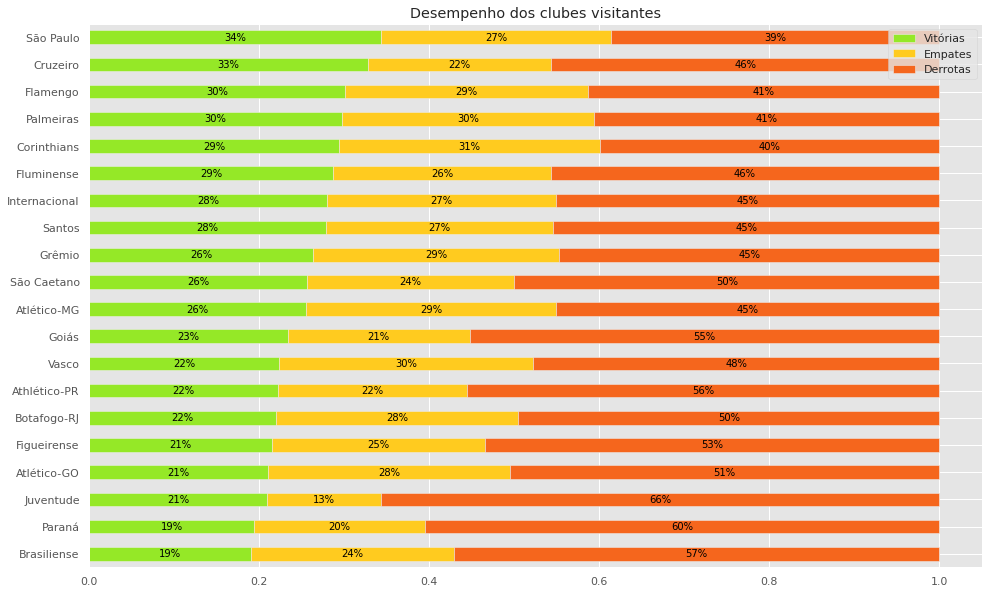

In [310]:
ax = vitoriasVisitante.nlargest(20,'Vitórias').sort_values('Vitórias').plot.barh(stacked=True, cmap='tab10', figsize=(16, 10),color={"Vitórias": "#95E827", "Empates": "#FFCB1F",'Derrotas': '#F5661D'})
ax.set_title('Desempenho dos clubes visitantes')
for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    if width > 0:
         ax.annotate(f'{width:.0%}',xy=(left+width/2, bottom+height/2), ha='center', va='center',color='black')

Esse gráfico, análogo ao anterior, mas para visitantes, monstra a importância das equipes desempenharem um bom desempenho fora de casa pois, olhando para os 8 primeiros colocados em desempenho em vitórias como visitante temos os 7 diferentes clubes que foram campeões desde o começo dos pontos corridos.

## Relação entre posse de bola e vitória

In [52]:
ganhou=[]
porcentagem=[]
maiorposse=0
menorposse=0
for i in range(4987,7267):
  if par.loc[i]['Vencedor']==par.loc[i]['Mandante']:
    ganhou.append(0)
  if par.loc[i]['Vencedor']==par.loc[i]['Visitante']:
    ganhou.append(1)
  if par.loc[i]['Vencedor']=='-':
    ganhou.append('-')
for j in est.index.unique():
  if ganhou[j-4987]==0:
    porcentagem.append(est.loc[j].iloc[0]['Posse de bola'])
  if ganhou[j-4987]==1:
    porcentagem.append(est.loc[j].iloc[1]['Posse de bola'])
x=['21%','22%','23%','24%','25%','26%','27%','28%','29%','30%','31%','32%','33%','34%','35%','36%','37%','38%','39%','40%','41%','42%','43%','44%','45%','46%','47%','48%','49%','50%','51%','52%','53%','54%','55%','56%','57%','58%','59%','60%','61%','62%','63%','64%','65%','66%','67%','68%','69%','70%','71%','72%','73%','74%','75%','76%','77%','78%']
for i in x:
  if i in ['51%','52%','53%','54%','55%','56%','57%','58%','59%','60%','61%','62%','63%','64%','65%','66%','67%','68%','69%','70%','71%','72%','73%','74%','75%','76%','77%','78%']:
    maiorposse+=porcentagem.count(i)
  if i!='50%':
    menorposse+=porcentagem.count(i)


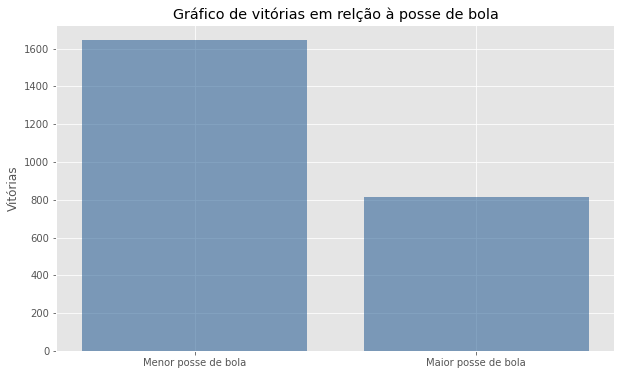

In [53]:
x = ['Menor posse de bola','Maior posse de bola']
y = [menorposse,maiorposse]
plt.figure(figsize=(10, 6))
plt.bar(x,y,color=(0.2,0.4,0.6,0.6))
plt.xticks(x)
plt.ylabel('Vitórias')
plt.title('Gráfico de vitórias em relação à posse de bola')
plt.show()

Apesar do senso comum acreditar que uma equipe está mais próximo da vitória caso esteja com uma maior posse de bola, a partir desse gráfico é nítido que a menor posse de bola converte basicamente o dobro de vitórias. Isso acontece pois, geralmente, equipes que tocam a bola de um lado para o outro sem objetividade acabam, geralmente, dando o contra-ataque para a equipe adversária que consegue converter com mais facilidade suas oportunidades em gols.

## Placares mais comuns

In [264]:
placares=[]
for i in par.index:
  a=int(par.loc[i]['Mandante Placar'])
  b=int(par.loc[i]['Visitante Placar'])
  placares.append(str(str(a)+'-'+str(b)))
placaresSemDuplicata=[]
for i in placares:
  if i not in placaresSemDuplicata:
    placaresSemDuplicata.append(i)
seriePlacares=pd.Series(placaresSemDuplicata)
seriePlacares.index=seriePlacares.values.copy()
for i in seriePlacares.index:
  seriePlacares.loc[i]=float(placares.count(i)/len(placares))
seriePlacares=seriePlacares.sort_values(ascending=False)
seriePlacares=seriePlacares[:12]
seriePlacares['Outros']=1-seriePlacares[:12].values.sum()


In [265]:
dfPlacar=pd.DataFrame()
dfPlacar['0']=[0]*5
dfPlacar['1']=[0]*5
dfPlacar['2']=[0]*5
dfPlacar['3']=[0]*5
dfPlacar['4+']=[0]*5
dfPlacar.index=['0','1','2','3','4+']
for i in par.index:
  a=int(par.loc[i]['Mandante Placar'])
  b=int(par.loc[i]['Visitante Placar'])
  if a>=4:
    a='4+'
  if b>=4:
    b='4+'
  a=str(a)
  b=str(b)
  dfPlacar.loc[b][a]+=1

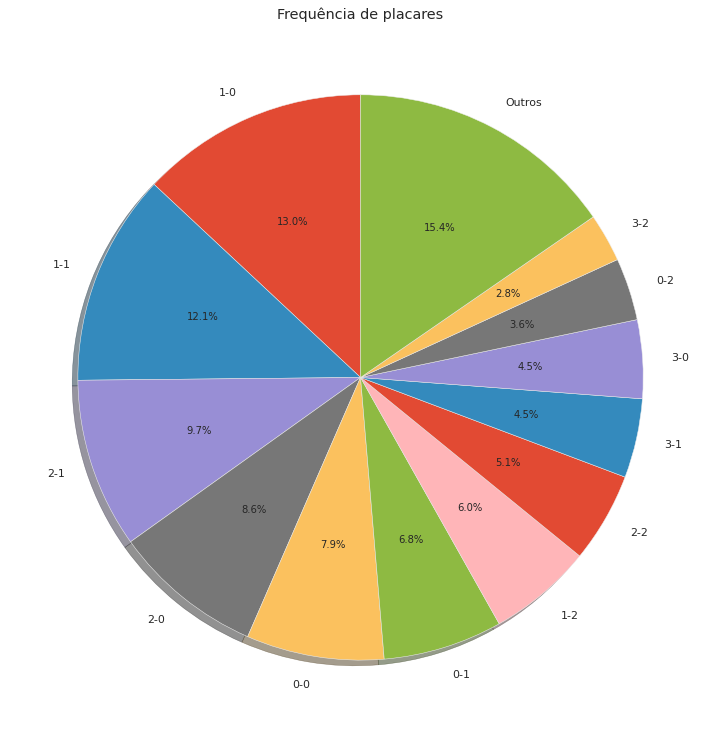

In [318]:
plt.figure(figsize=(20,13))
plt.pie(seriePlacares.values,labels=seriePlacares.index,autopct='%1.1f%%',shadow=True, startangle=90);
plt.title('Frequência de placares')
plt.show()

Uma visualização alternativa:     
Perceba a predominância do placar '1-0'.

Text(0.5, 1.0, 'Frequência de placares')

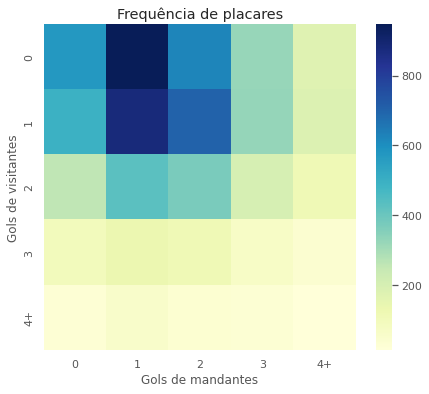

In [319]:
plt.figure(figsize=(7,6))
sns.heatmap(dfPlacar,cmap='YlGnBu')
plt.xlabel('Gols de mandantes')
plt.ylabel('Gols de visitantes')
plt.title('Frequência de placares')

# Impactos da implementação do VAR

Com a implementação do VAR em 2019 esperava-se que o número de infrações crescessem, visto que elas poderiam ser identificadas com mais facilidade. Entretanto, os resultados mostraram o oposto, porém, é possível interpretar que a implementação do VAR gerou um cuidado maior por partes dos jogadores em 2019. Isso pode ser provado pois logo na temporada seguinte o número de faltas regularizou-se aos níveis anteriores, ou seja, os jogadores estavam se acostumando à inovação tecnológica e comportaram-se de forma conservadora durante esse período de adaptação.

In [59]:
serieFaltas=pd.Series()
for ano in list(range(2015,2020+1)):
  serieFaltas.loc[ano]=contaDados(ano,'f')
serieImpedimentos=pd.Series()
for ano in list(range(2015,2020+1)):
  serieImpedimentos.loc[ano]=contaDados(ano,'i')
serieCA=pd.Series()
for ano in list(range(2015,2020+1)):
  serieCA.loc[ano]=contaDados(ano,'ca')
serieCV=pd.Series()
for ano in list(range(2015,2020+1)):
  serieCV.loc[ano]=contaDados(ano,'cv')


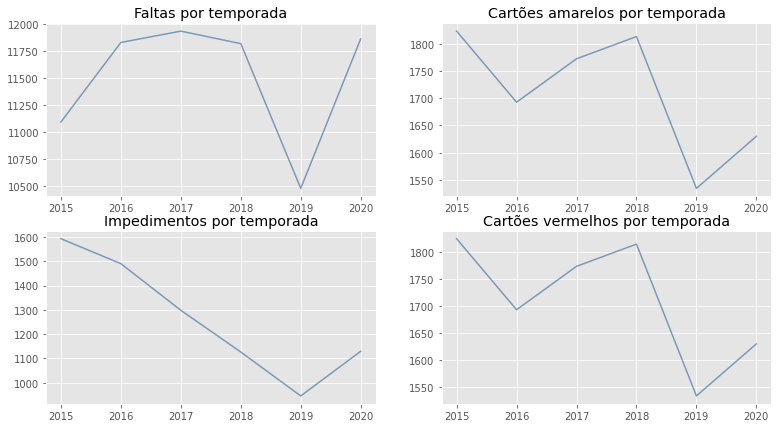

In [60]:
fig,ax=plt.subplots(2,2,figsize=(13,7))
ax[0, 0].plot(serieFaltas.index,serieFaltas.values,color=(0.2, 0.4, 0.6, 0.6))
ax[1, 0].plot(serieImpedimentos.index,serieImpedimentos.values,color=(0.2, 0.4, 0.6, 0.6))
ax[0, 1].plot(serieCA.index,serieCA.values,color=(0.2, 0.4, 0.6, 0.6))
ax[1, 1].plot(serieCA.index,serieCA.values,color=(0.2, 0.4, 0.6, 0.6))
ax[0,0].title.set_text('Faltas por temporada')
ax[1,0].title.set_text('Impedimentos por temporada')
ax[0,1].title.set_text('Cartões amarelos por temporada')
ax[1,1].title.set_text('Cartões vermelhos por temporada')
fig.show()

# Fontes e Referências
https://futdados.com/pontos-corridos-todas-as-campanhas-acumuladas-desde-2003/ \
https://www.kaggle.com/adaoduque/campeonato-brasileiro-de-futebol